<a href="https://colab.research.google.com/github/Swastik26/Exploratory-Weather-Analysis/blob/main/EDA_Weather_Datset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

from matplotlib.colors import ListedColormap

In [7]:
sns.set_style("whitegrid")

In [8]:
# reading the data
df_we=pd.read_csv(r"/content/weatherHistory.csv (1).zip")
df_we.head()

Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   
1                   259.0          15.8263         0.0               1015.63   
2                   204.0          14.9569         0.0               1015.94   
3                   269.0          15.8263         0.0               1016.41   
4                   259.0          15.8263         0.0               1016.51   

                       Daily Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  
2  Partly cloudy throughout the day.  
3  Partly cloudy throughout the day.  
4  Partly cloudy throughout the day.

In [9]:
# getting info
df_we.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [10]:
# description of numerical variables
df_we.describe().transpose()

count         mean         std        min  \
Temperature (C)           96453.0    11.932678    9.551546 -21.822222   
Apparent Temperature (C)  96453.0    10.855029   10.696847 -27.716667   
Humidity                  96453.0     0.734899    0.195473   0.000000   
Wind Speed (km/h)         96453.0    10.810640    6.913571   0.000000   
Wind Bearing (degrees)    96453.0   187.509232  107.383428   0.000000   
Visibility (km)           96453.0    10.347325    4.192123   0.000000   
Loud Cover                96453.0     0.000000    0.000000   0.000000   
Pressure (millibars)      96453.0  1003.235956  116.969906   0.000000   

                                  25%        50%          75%          max  
Temperature (C)              4.688889    12.0000    18.838889    39.905556  
Apparent Temperature (C)     2.311111    12.0000    18.838889    39.344444  
Humidity                     0.600000     0.7800     0.890000     1.000000  
Wind Speed (km/h)            5.828200     9.9659    14.135800    63.852600  
Wind Bearing (degrees)     116.000000   180.0000   290.000000   359.000000  
Visibility (km)              8.339800    10.0464    14.812000    16.100000  
Loud Cover                   0.000000     0.0000     0.000000     0.000000  
Pressure (millibars)      1011.900000  1016.4500  1021.090000  1046.380000

In [11]:
# description of categorical variables
df_we.describe(include=object).transpose()

count unique                                top   freq
Formatted Date  96453  96429      2010-08-02 00:00:00.000 +0200      2
Summary         96453     27                      Partly Cloudy  31733
Precip Type     95936      2                               rain  85224
Daily Summary   96453    214  Mostly cloudy throughout the day.  20085

In [12]:
# checking for null values
df_we.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [13]:
# checking for duplicates and dropping if any exisis.
df_we.duplicated().sum()

24

In [14]:
# dropping the duplicated  raws
df_we.drop_duplicates(inplace=True)

In [15]:
# dropping loud cover as it has only one value (only zero)
df_we.drop('Loud Cover', axis=1, inplace=True)

In [16]:
df_we.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')

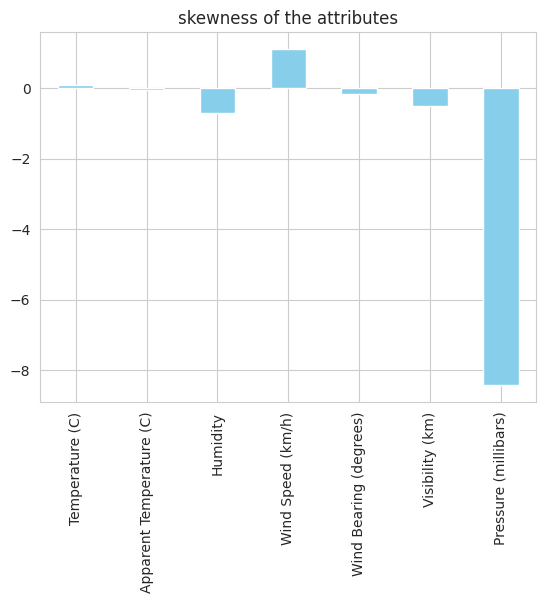

In [18]:
# checking for skewness of the data
# Select only numerical columns for skewness calculation
numerical_cols = df_we.select_dtypes(include=np.number).columns
df_we[numerical_cols].skew().plot(kind='bar', color='skyblue')
plt.title('skewness of the attributes')
plt.show()

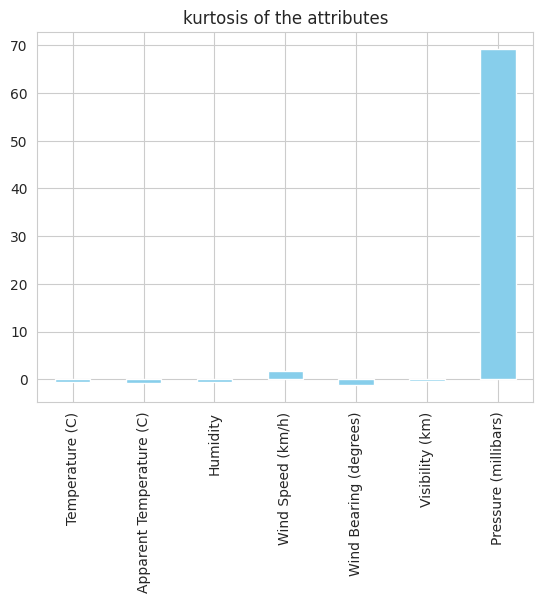

In [20]:
# kurtosis of the attributes

# Exclude non-numeric columns before calculating kurtosis
numerical_cols = df_we.select_dtypes(include=np.number).columns
df_we[numerical_cols].kurt().plot(kind='bar', color='skyblue')

plt.title('kurtosis of the attributes')
plt.show()

# univariate analysis

In [21]:
# separating numerical and categorical variables

df_num=df_we.select_dtypes(exclude=object)
df_cat=df_we.select_dtypes(include=object)

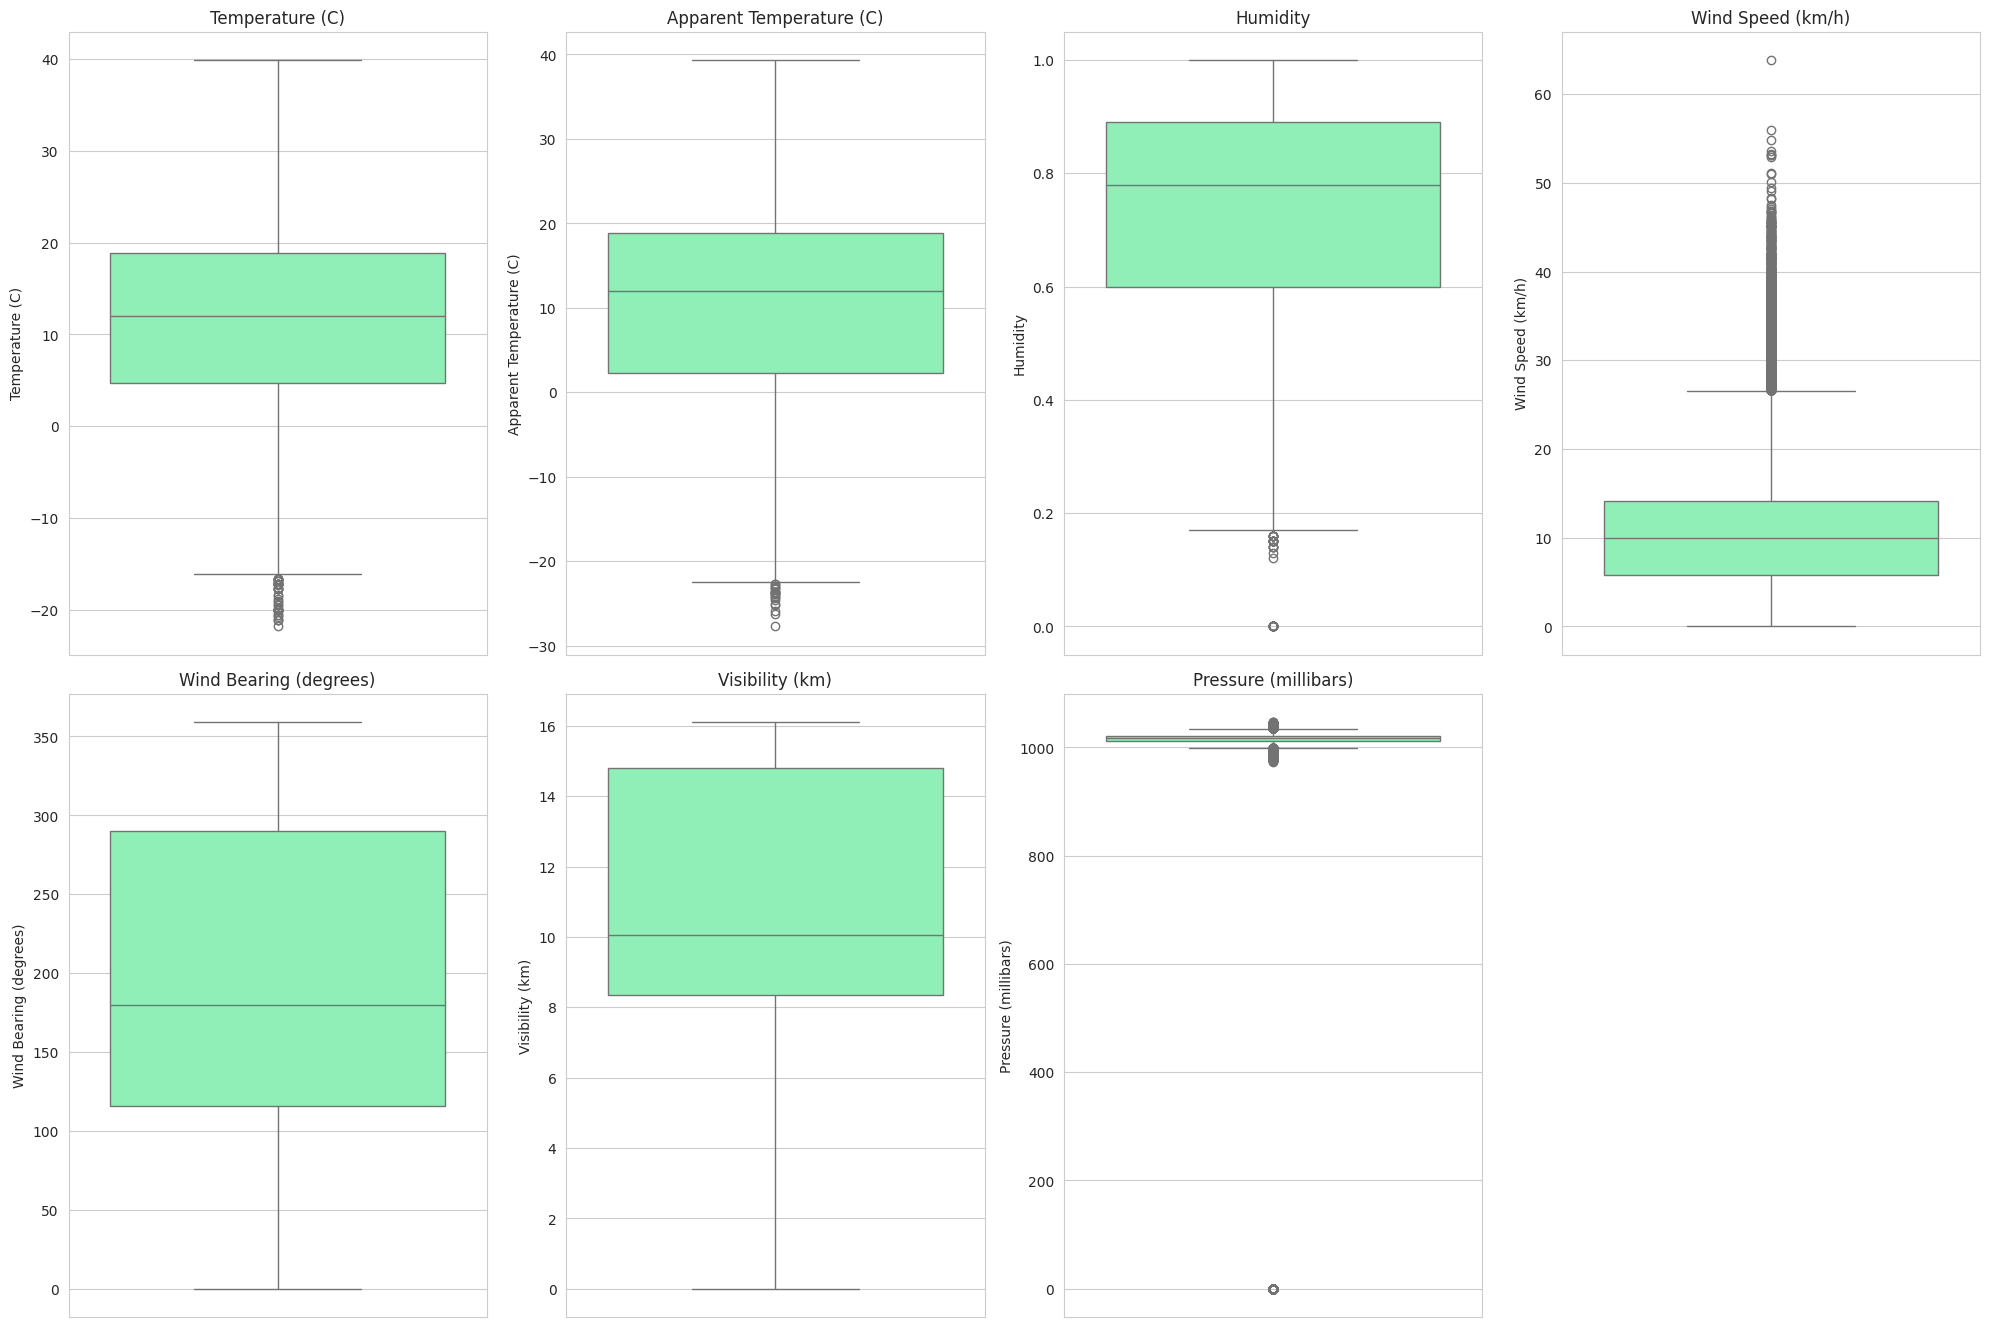

In [22]:
# checking for outliers through boxplot

plt.figure(figsize=(20,20))

re=1
for i in df_num.columns:
    plt.subplot(3,4,re)
    sns.boxplot(df_we[i], palette='rainbow')
    plt.title(i)
    re+=1
plt.tight_layout()

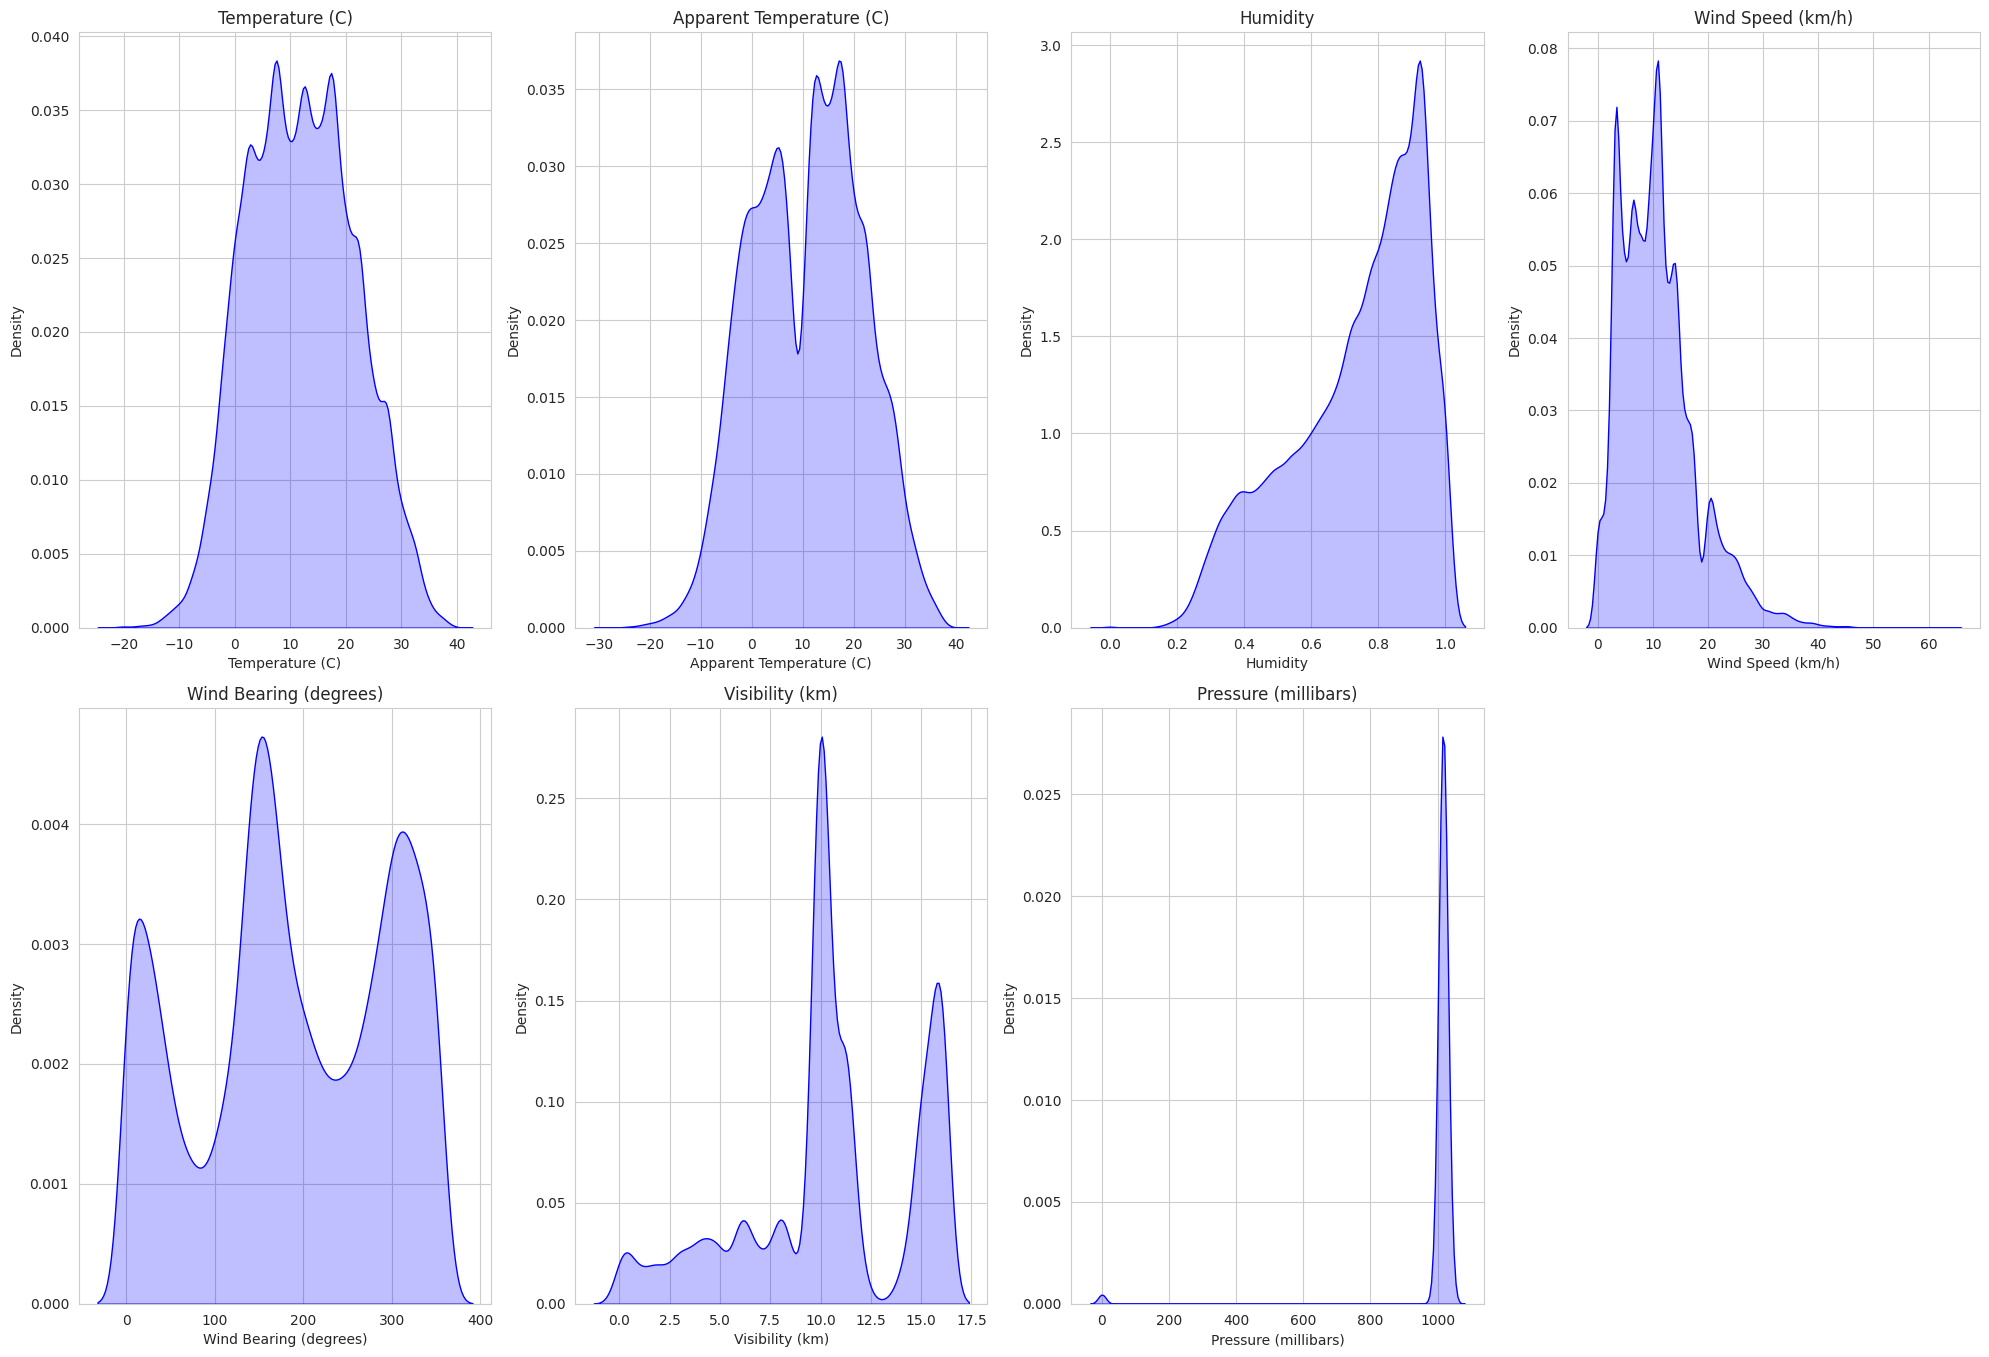

In [23]:
# plotting kde
plt.figure(figsize=(20,20))

re=1
for i in df_num.columns:
    plt.subplot(3,4,re)
    sns.kdeplot(df_we[i], fill=True,color='blue')
    plt.title(i)
    re+=1
plt.tight_layout()

In [24]:
# checking number of unique values in each columns
df_we.nunique()

Formatted Date              96429
Summary                        27
Precip Type                     2
Temperature (C)              7574
Apparent Temperature (C)     8984
Humidity                       90
Wind Speed (km/h)            2484
Wind Bearing (degrees)        360
Visibility (km)               949
Pressure (millibars)         4979
Daily Summary                 214
dtype: int64

In [25]:
# the date column give the day in which the fata has been collected
df_we['Formatted Date'].nunique()  # nothing analyse here

96429

In [26]:
df_we['Summary'].value_counts()

Summary
Partly Cloudy                          31726
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10873
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and Overcast                         7
Windy and Foggy                            4
Windy and Dry                              1
Dangerously Windy and Partly Cloudy        1
Breezy and Dry                             1
Name: count, dtype: int64

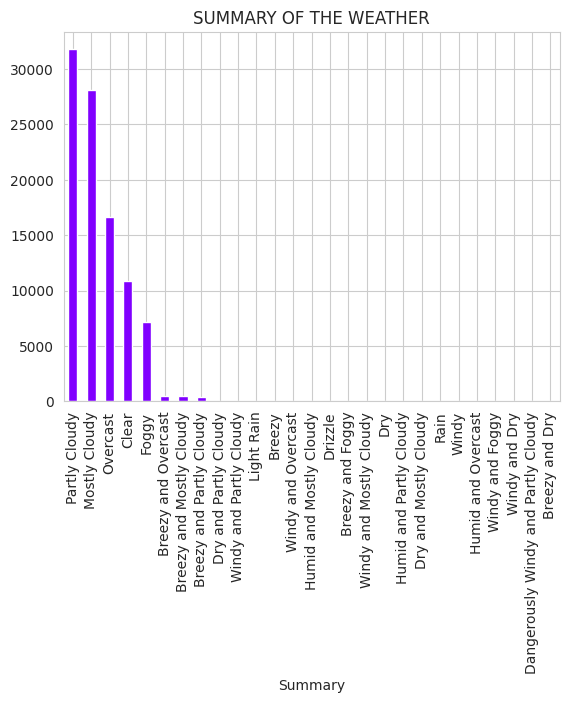

In [27]:
df_we['Summary'].value_counts().plot(kind='bar', cmap='rainbow')
plt.title('SUMMARY OF THE WEATHER')
plt.show()

In [28]:
# checking precipitation type
df_we['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

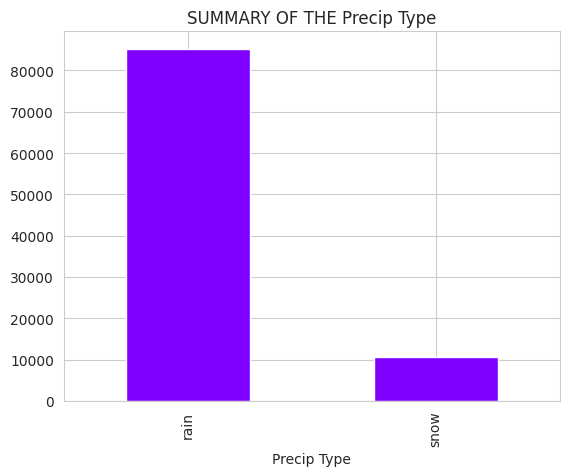

In [29]:
df_we['Precip Type'].value_counts().plot(kind='bar', cmap='rainbow')
plt.title('SUMMARY OF THE Precip Type')
plt.show()

In [30]:
df_we['Daily Summary'].value_counts()

Daily Summary
Mostly cloudy throughout the day.                                                                       20085
Partly cloudy throughout the day.                                                                        9981
Partly cloudy until night.                                                                               6169
Partly cloudy starting in the morning.                                                                   5184
Foggy in the morning.                                                                                    4201
                                                                                                        ...  
Breezy starting overnight continuing until morning and foggy overnight.                                    24
Mostly cloudy throughout the day and breezy starting overnight continuing until afternoon.                 24
Partly cloudy starting in the morning and breezy starting in the afternoon continuing until evening.       24
Rain until afternoon.                                                                                      24
Foggy starting overnight continuing until morning and breezy in the afternoon.                             23
Name: count, Length: 214, dtype: int64

In [31]:
df_we.drop('Daily Summary', axis=1, inplace=True)

# Bivariate analysis

Summary vs Precip Type

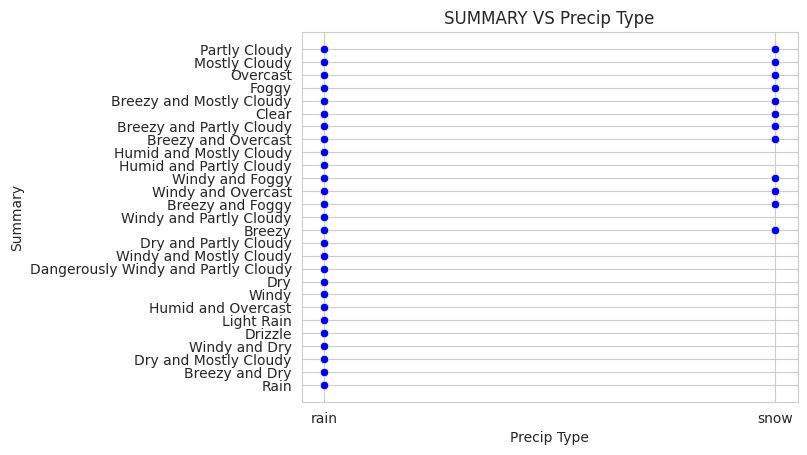

In [32]:
sns.scatterplot(y=df_we['Summary'], x=df_we['Precip Type'], color='blue')
plt.title('SUMMARY VS Precip Type')
plt.show()

1. precipitation type vs other variables

In [33]:
df_new_num=df_we.drop(['Formatted Date','Summary','Precip Type' ], axis=1)

In [34]:
df_new_num

Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0             9.472222                  7.388889      0.89            14.1197   
1             9.355556                  7.227778      0.86            14.2646   
2             9.377778                  9.377778      0.89             3.9284   
3             8.288889                  5.944444      0.83            14.1036   
4             8.755556                  6.977778      0.83            11.0446   
...                ...                       ...       ...                ...   
96448        26.016667                 26.016667      0.43            10.9963   
96449        24.583333                 24.583333      0.48            10.0947   
96450        22.038889                 22.038889      0.56             8.9838   
96451        21.522222                 21.522222      0.60            10.5294   
96452        20.438889                 20.438889      0.61             5.8765   

       Wind Bearing (degrees)  Visibility (km)  Pressure (millibars)  
0                       251.0          15.8263               1015.13  
1                       259.0          15.8263               1015.63  
2                       204.0          14.9569               1015.94  
3                       269.0          15.8263               1016.41  
4                       259.0          15.8263               1016.51  
...                       ...              ...                   ...  
96448                    31.0          16.1000               1014.36  
96449                    20.0          15.5526               1015.16  
96450                    30.0          16.1000               1015.66  
96451                    20.0          16.1000               1015.95  
96452                    39.0          15.5204               1016.16  

[96429 rows x 7 columns]

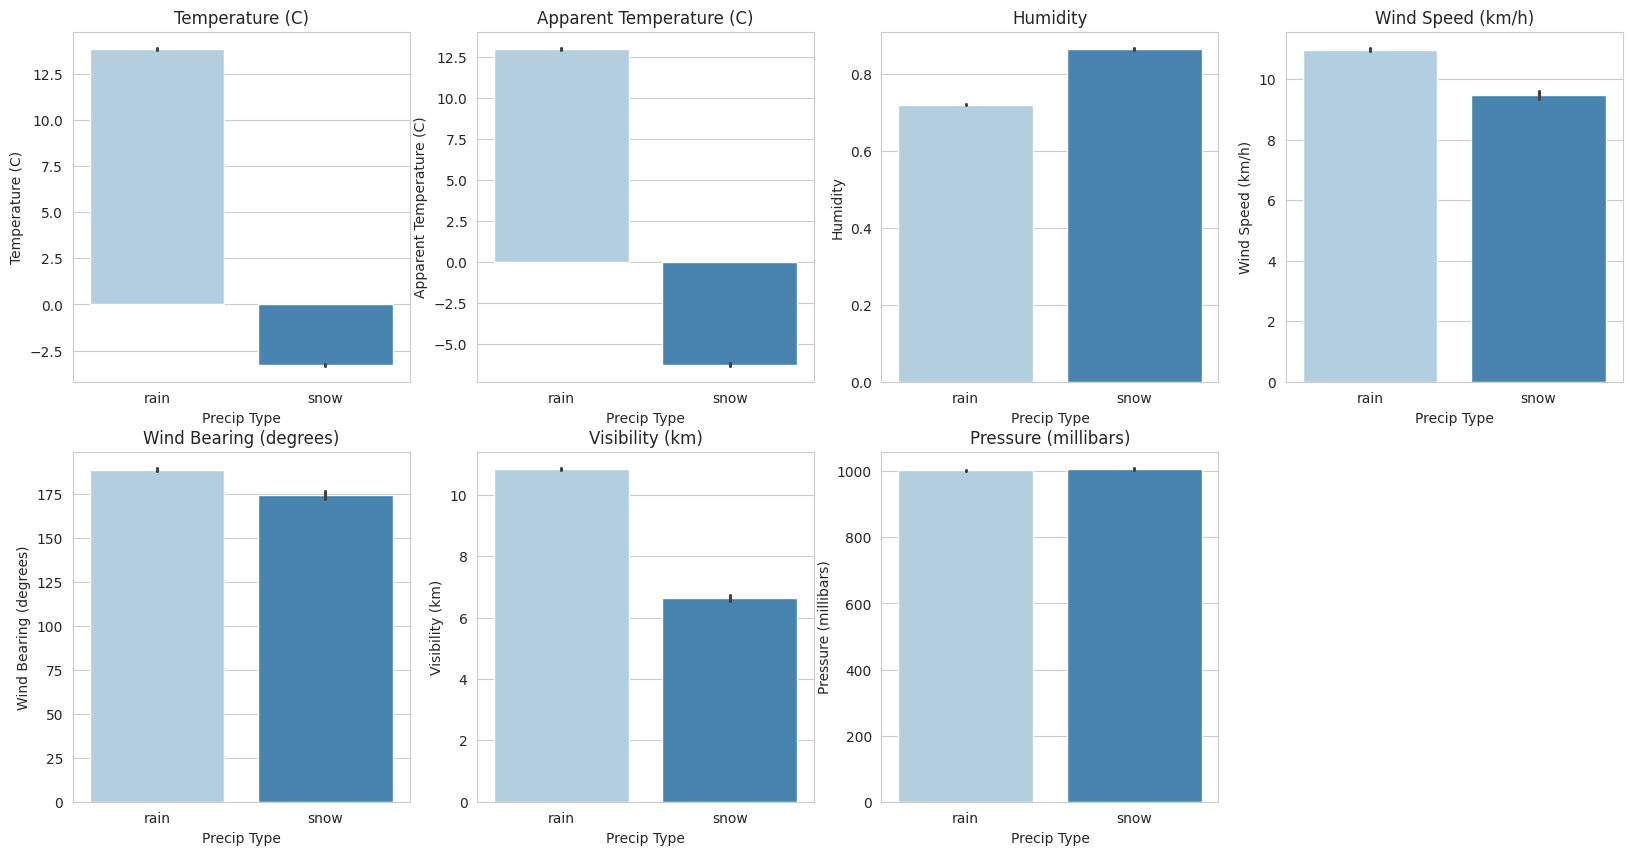

In [35]:
plt.figure(figsize=(20,10))
re=1
for i in df_new_num.columns:
    plt.subplot(2,4,re)
    sns.barplot(x=df_we['Precip Type'], y=df_new_num[i],palette='Blues')
    re+=1
    plt.title(i)

plt.show()

temperature (apparent T also) of the day with snow is lower compared to the days with rain
1. avg. humidity is high on snowy days
2. avg. wind speed is low on snowy days comapred to wind speed in rainy days
3. avg visibility is low in smowy day compared to the rainy days
4. avg pressure on both precipitation types shows no dofference.

# 2.summary vs other variables

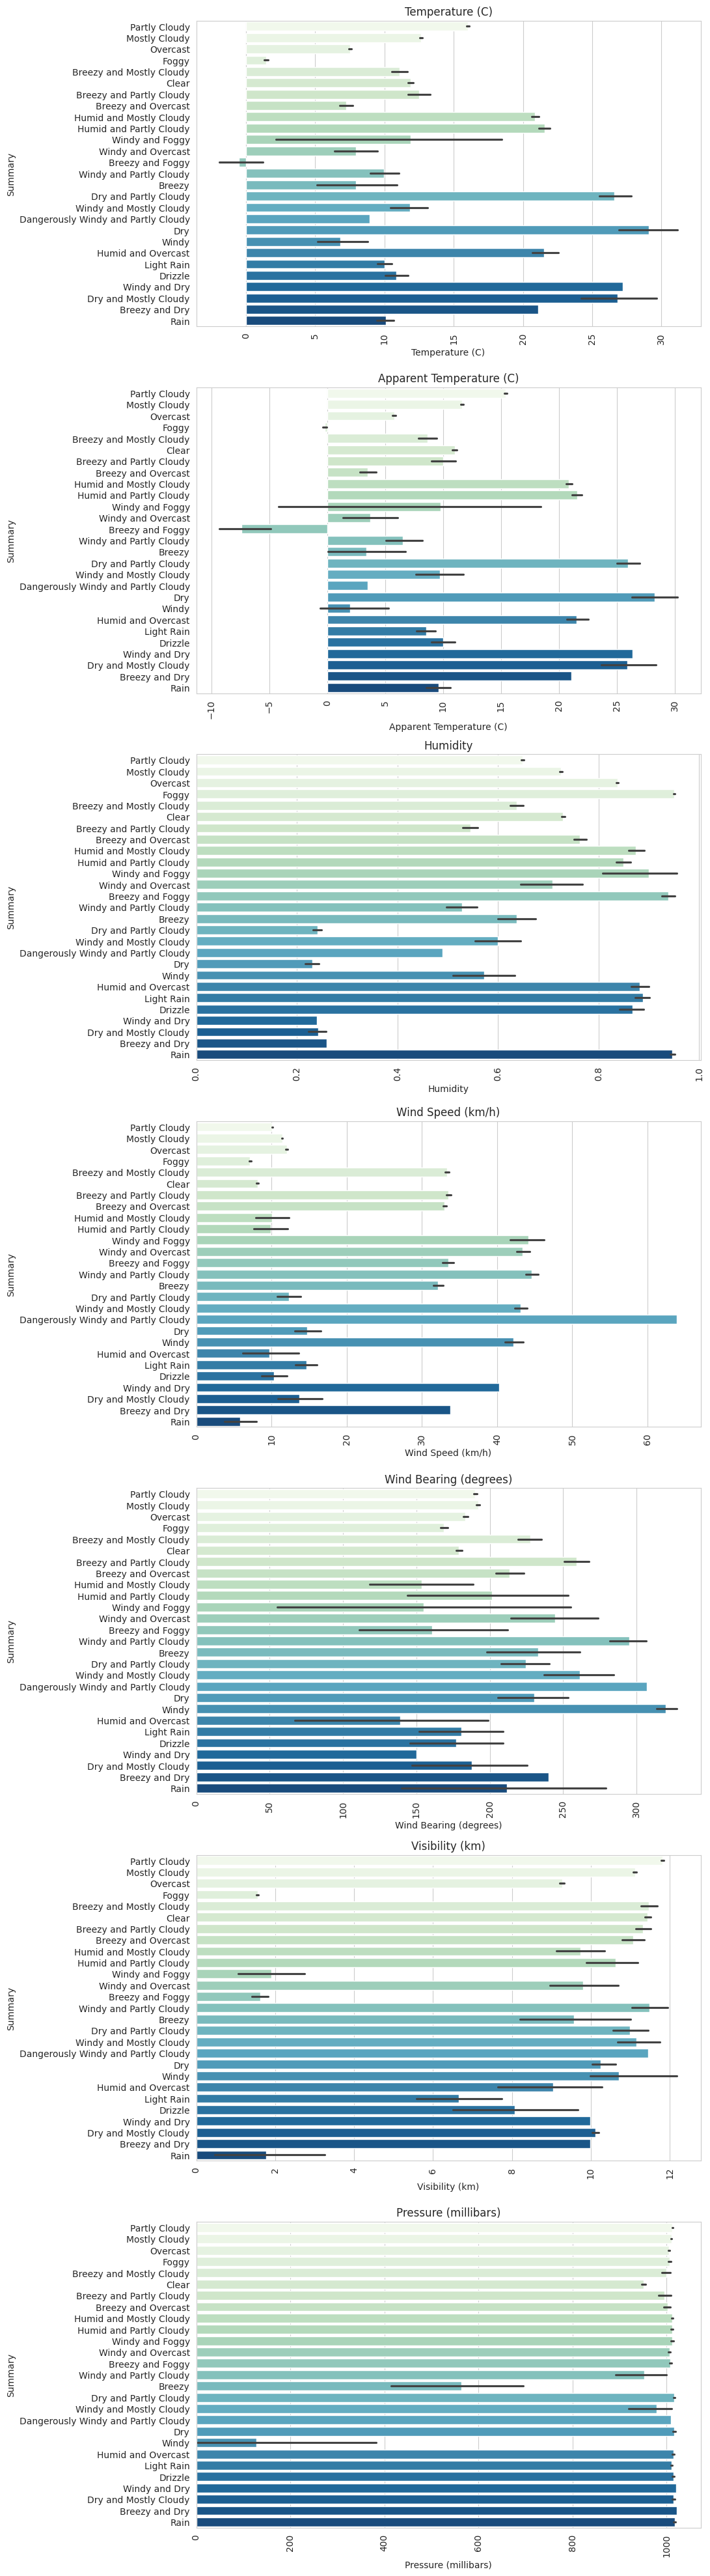

<Figure size 640x480 with 0 Axes>

In [36]:
# plotting summary vs all numerical variables
plt.figure(figsize=(10,50))
re=1
for i in df_new_num.columns:
    plt.subplot(7,1,re)
    sns.barplot(y=df_we['Summary'], x=df_new_num[i],palette='GnBu')
    re+=1
    plt.title(i)
    plt.xticks(rotation=90)

plt.show()
plt.tight_layout()

1. temperature on the dry day is the highest while temperature on the foggy abd breezy day is the lowest.
2. humidity is high on foggy days
3. wind speed will be high on dangerously windy and patialy cloudy day
4. visibility will be low on foggy days
5. pressure will be low on windy and breezy days

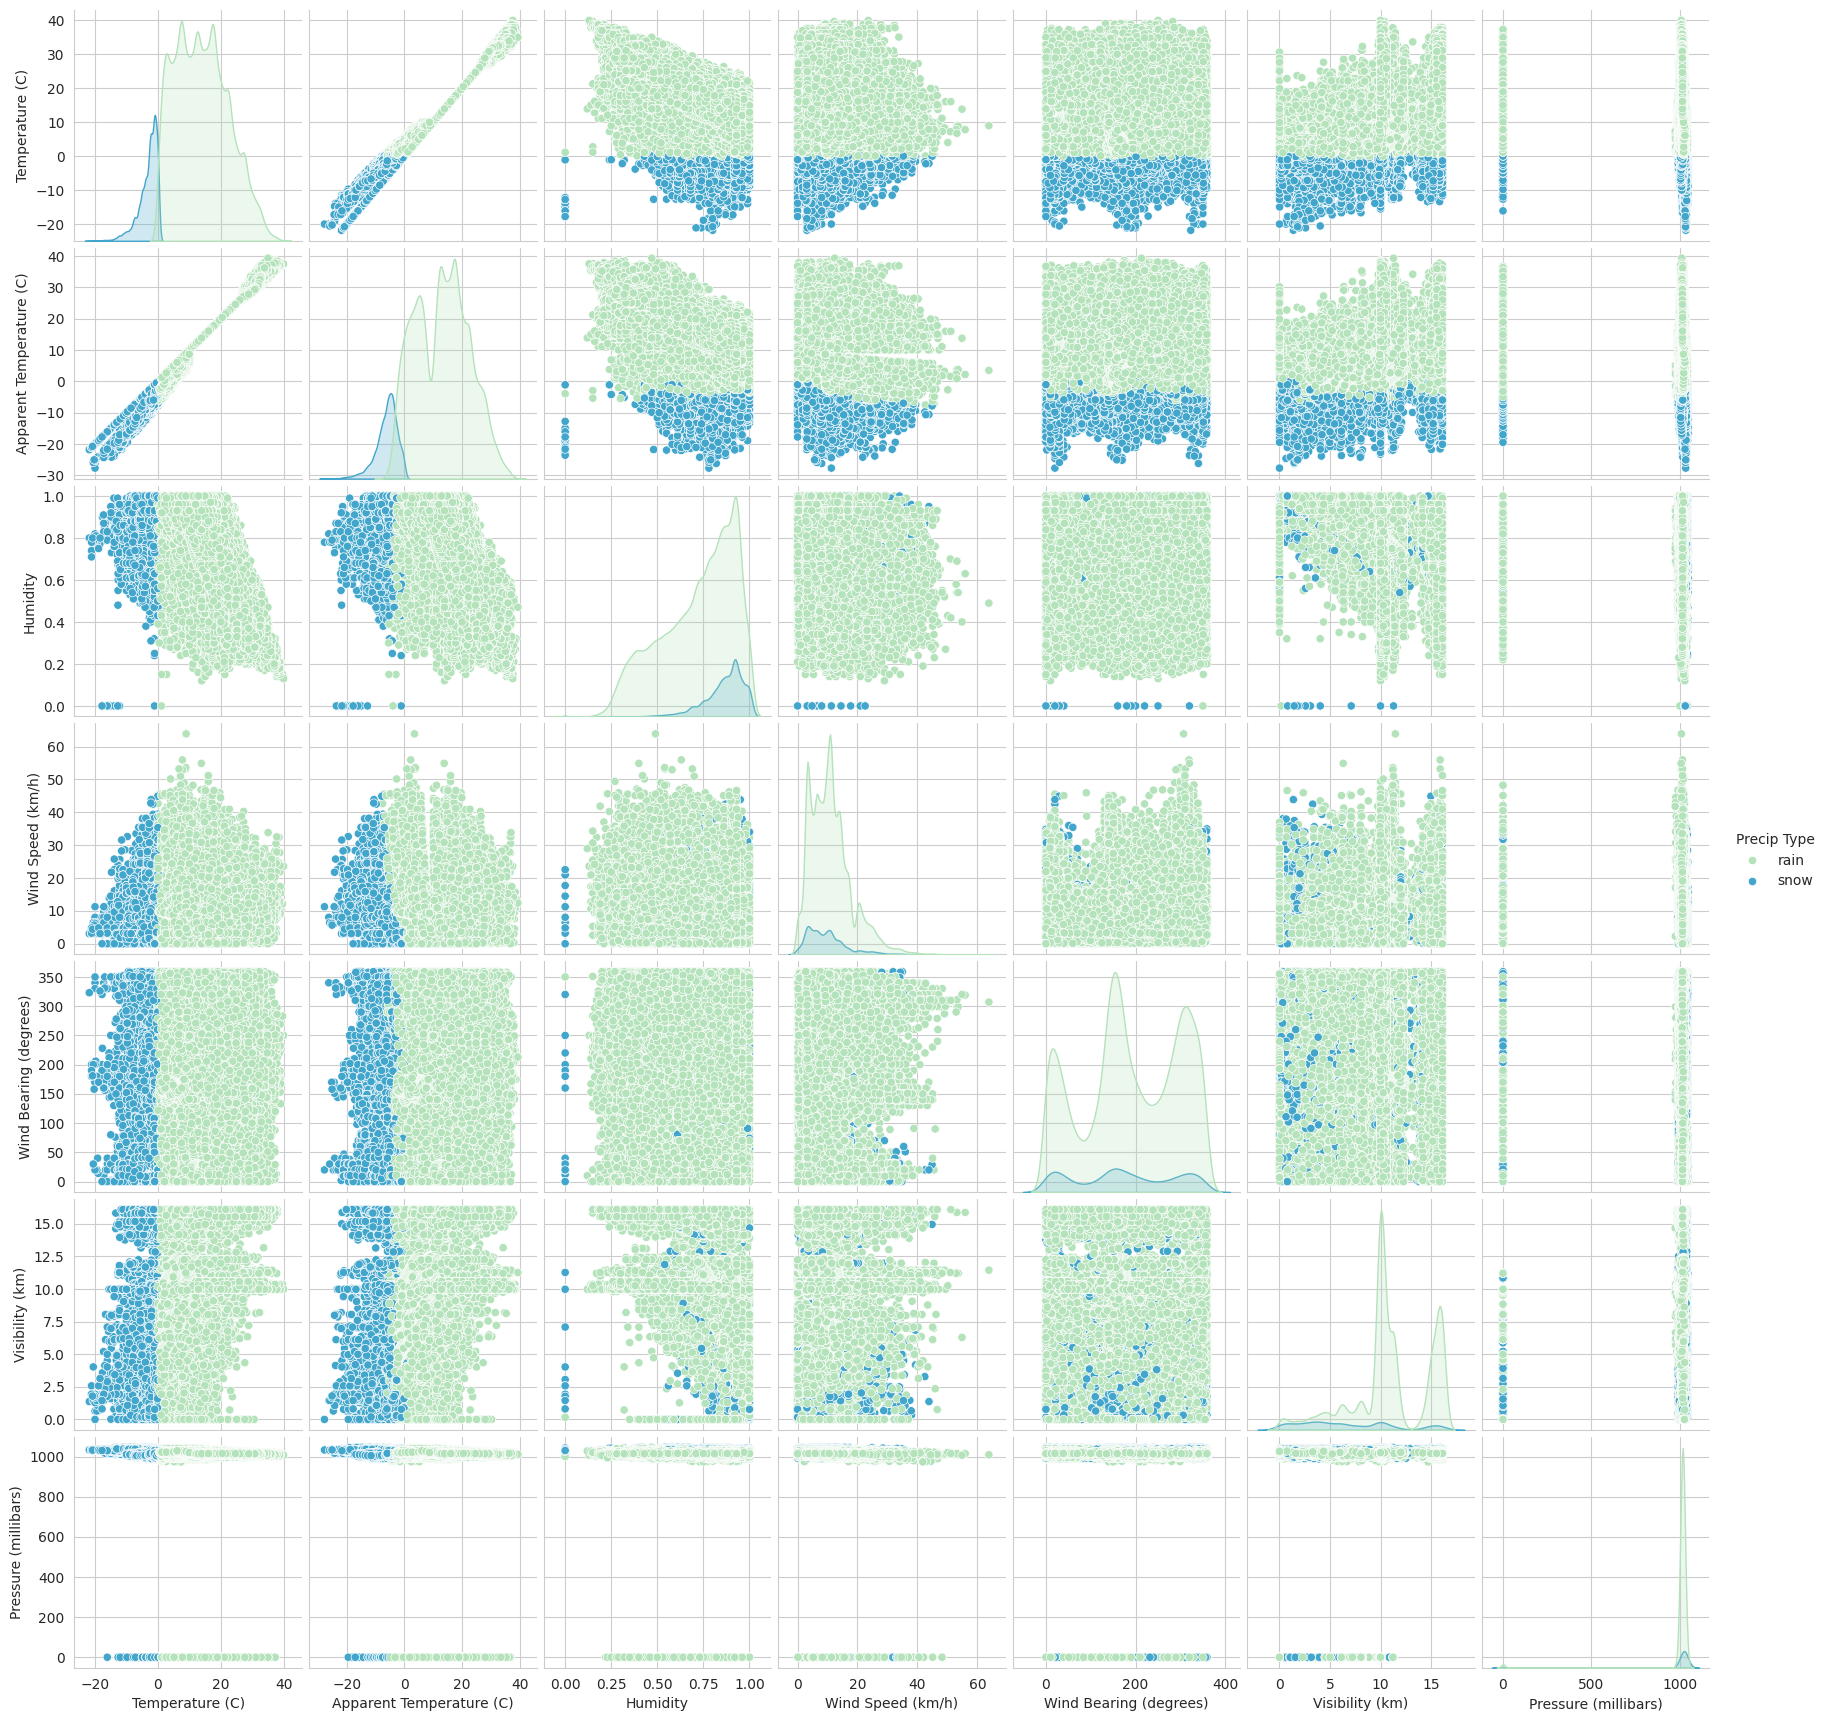

In [37]:
sns.pairplot(df_we, hue='Precip Type',palette='GnBu')

<Axes: >

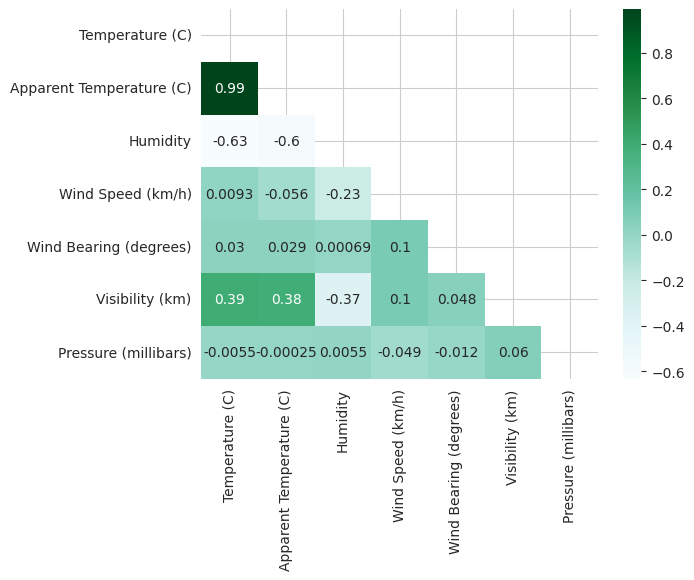

In [39]:
sns.heatmap(df_we.select_dtypes(include=np.number).corr(), annot=True, mask=np.triu(df_we.select_dtypes(include=np.number).corr()), cmap='BuGn')

1. high correlation exists between temperature and humidity, visibility and humidity
2. apparent temperature and temperature are highly correlated
3. windspeed and humidity also shows some correlation

# DOING SOME FEATURE ENGINEERING

TO UNDERSTAND RELATIONS BETWEEN YEAR, MONTH,DATE,TIME,UCTOFFSET TO THE PRECIPITATION AND SUMMARY AND OTHER NUMERIC VARIABLES

In [40]:
df_we.head() # from the formated DATE column,  year, month and date and time can be separted into new columns

Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Pressure (millibars)  
0                   251.0          15.8263               1015.13  
1                   259.0          15.8263               1015.63  
2                   204.0          14.9569               1015.94  
3                   269.0          15.8263               1016.41  
4                   259.0          15.8263               1016.51

In [41]:
(df_we['Formatted Date'].str.split(" ", expand=True))[1]

0        00:00:00.000
1        01:00:00.000
2        02:00:00.000
3        03:00:00.000
4        04:00:00.000
             ...     
96448    19:00:00.000
96449    20:00:00.000
96450    21:00:00.000
96451    22:00:00.000
96452    23:00:00.000
Name: 1, Length: 96429, dtype: object

In [42]:
#  splitting the formatted date and saving year,month and date separate.
df_we[['YEAR','MONTH','DATE']]=(df_we['Formatted Date'].str.split(" ", expand=True))[0].str.split("-", expand=True)

In [43]:
# getting time and creating new column called time
df_we['time']=(df_we['Formatted Date'].str.split(" ", expand=True))[1]

In [44]:
# getting the utc offset and creating a new column called utc offset
df_we['UTC offset']=(df_we['Formatted Date'].str.split(" ", expand=True))[2]

In [45]:
# as time has only hours iam splitting it and converting it into numericl for better calculation
df_we['time']=df_we['time'].str.split(':', expand=True)[0]

In [46]:
# dropping formatted year column
df_we1=df_we.drop('Formatted Date', axis=1)

In [47]:
df_we1.columns

Index(['Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Pressure (millibars)', 'YEAR', 'MONTH', 'DATE',
       'time', 'UTC offset'],
      dtype='object')

In [48]:
# getting the info about the new data
df_we1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96429 entries, 0 to 96452
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   96429 non-null  object 
 1   Precip Type               95912 non-null  object 
 2   Temperature (C)           96429 non-null  float64
 3   Apparent Temperature (C)  96429 non-null  float64
 4   Humidity                  96429 non-null  float64
 5   Wind Speed (km/h)         96429 non-null  float64
 6   Wind Bearing (degrees)    96429 non-null  float64
 7   Visibility (km)           96429 non-null  float64
 8   Pressure (millibars)      96429 non-null  float64
 9   YEAR                      96429 non-null  object 
 10  MONTH                     96429 non-null  object 
 11  DATE                      96429 non-null  object 
 12  time                      96429 non-null  object 
 13  UTC offset                96429 non-null  object 
dtypes: float64(

checking valuecounts in year

In [49]:
# checking the unique years the year column
df_we1.YEAR.unique()

array(['2006', '2010', '2007', '2008', '2009', '2011', '2012', '2013',
       '2014', '2015', '2016'], dtype=object)

In [50]:
#  getting value counts of the year so that we can know how the data is being collected over the years
df_we1['YEAR'].value_counts()

YEAR
2008    8784
2012    8784
2016    8784
2006    8760
2010    8760
2007    8760
2009    8760
2011    8760
2013    8760
2015    8760
2014    8757
Name: count, dtype: int64

it seems that data collection has been done regularly for all the years. confirming with barplot.

<Axes: xlabel='YEAR'>

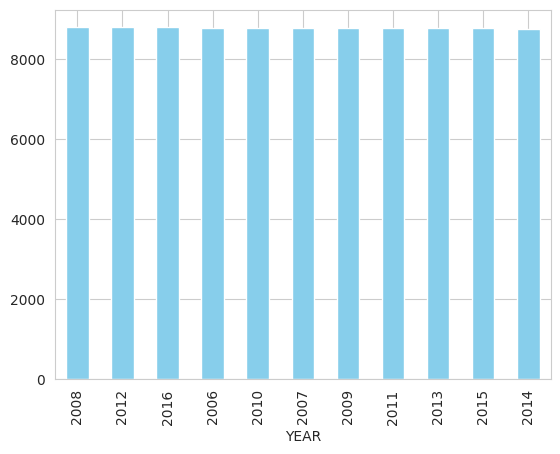

In [51]:
df_we1['YEAR'].value_counts().plot(kind='bar', color='skyblue')

# plots-YEAR VS NUMERICAL DATA

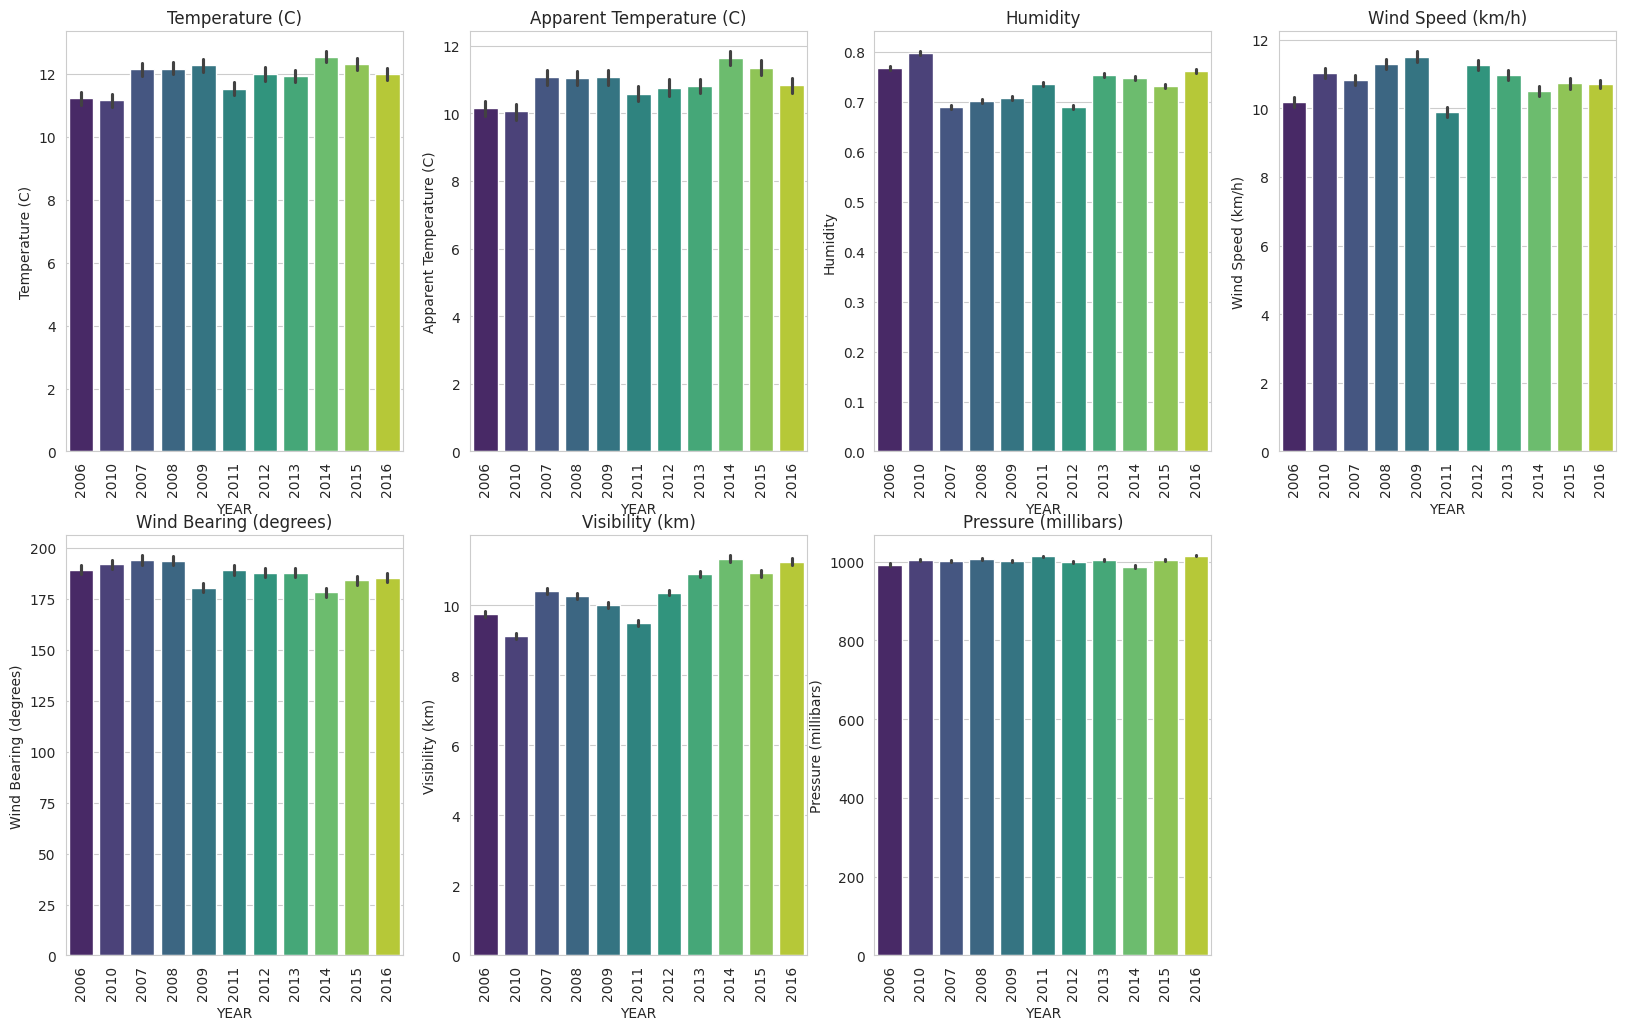

In [54]:
plt.figure(figsize=(20,12))
re=1
for i in df_new_num.columns:
    plt.subplot(2,4,re)
    sns.barplot(x=df_we['YEAR'], y=df_new_num[i],palette='viridis') # Removed 'vi'
    re+=1
    plt.title(i)
    plt.xticks(rotation=90)

plt.show()

1. avg temperature shows an increase from 2006 to 2016.
2. avg humidity was low in 2012 while humidity was high in 2010
3. avg wind speed was low in 2011
4. avg lowest visibility was in 2010
5. avg pressure shows no appreciable change throughout these years

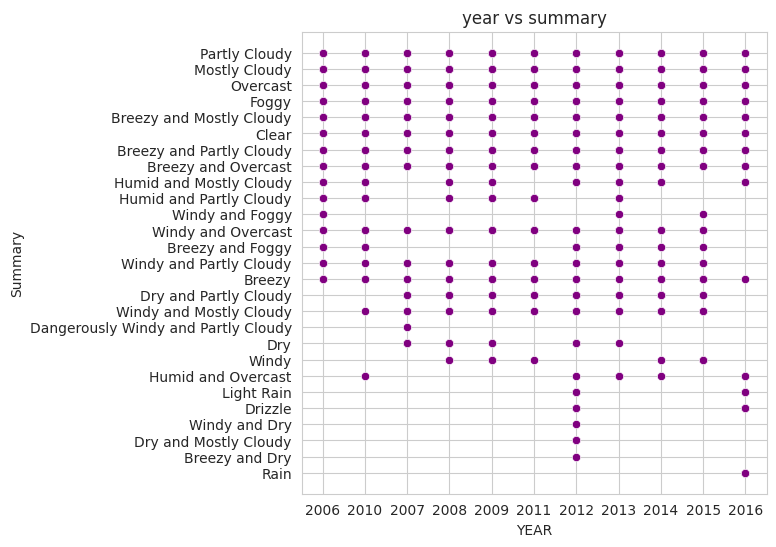

In [55]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=df_we1['YEAR'], y=df_we1['Summary'], color='purple')
plt.title('year vs summary')
plt.show()

1. only 2012 shows an eqaul distribution of all summary weather.
2. while 2006,2007,2008 etc has not that much diversity in the summary.

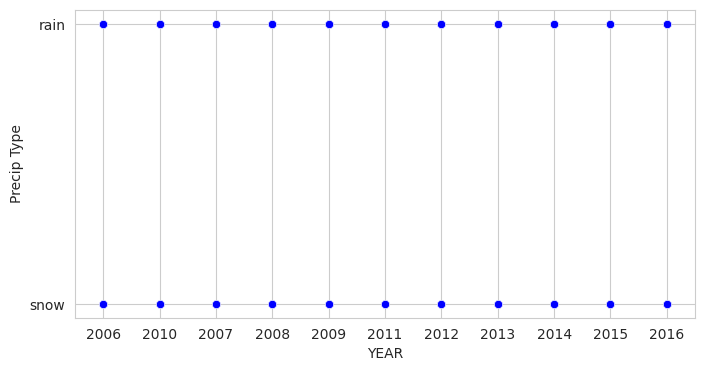

In [56]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=df_we1['YEAR'], y=df_we1['Precip Type'], color='blue')
plt.show()

# plots - MONTH VS SUMMARY AND PRECIPITATION (year not considered)

In [57]:
# sort the data based on moth
df_we2=df_we1.sort_values(by='MONTH')  # to get a pattern in the data

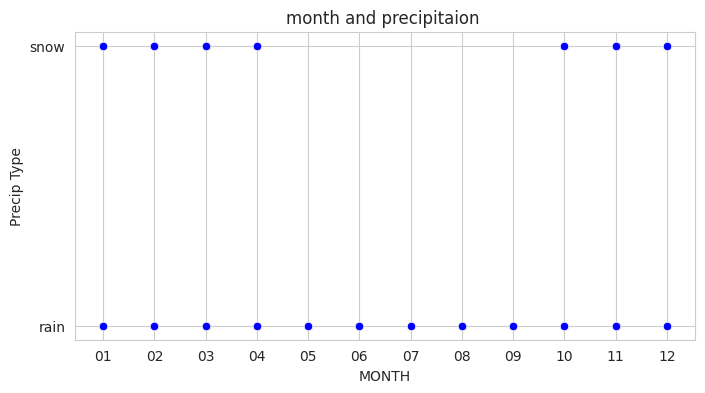

In [58]:
# scatterplot between month and precipitaion
plt.figure(figsize=(8,4))
sns.scatterplot(x=df_we2['MONTH'], y=df_we2['Precip Type'], color='blue')
plt.title('month and precipitaion ')
plt.show()

1. all month may get rain.
2. snow is absent in 5,6,7,8,9 months.

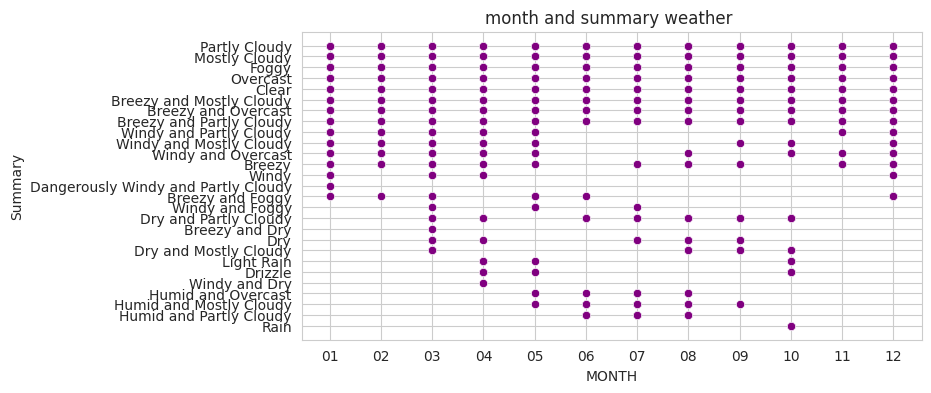

In [59]:
# scatterplot between month and summary
plt.figure(figsize=(8,4))
sns.scatterplot(x=df_we2['MONTH'], y=df_we2['Summary'], color='purple')
plt.title('month and summary weather ')
plt.show()

# plots= DATE VS SUMMARY AND PRECIPITATION (year not considered)

In [60]:
# sorting on the basis of date
df_we2=df_we1.sort_values(by='DATE')

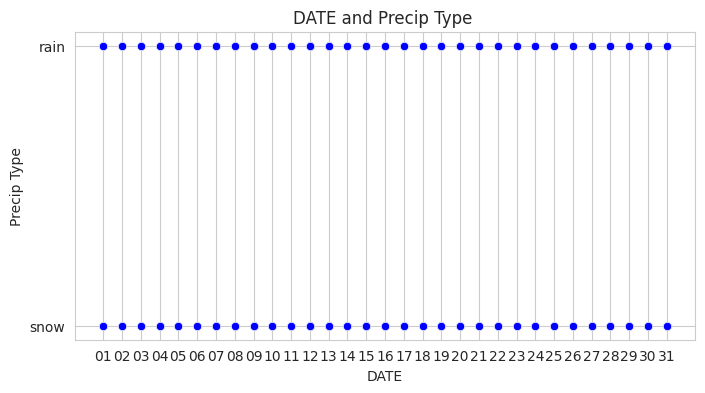

In [61]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=df_we2['DATE'], y=df_we2['Precip Type'], color='Blue')
plt.title('DATE and Precip Type ')
plt.show()

NO RELATIONSHIP BETWEEN DAY AND PRECIPITATION TYPE

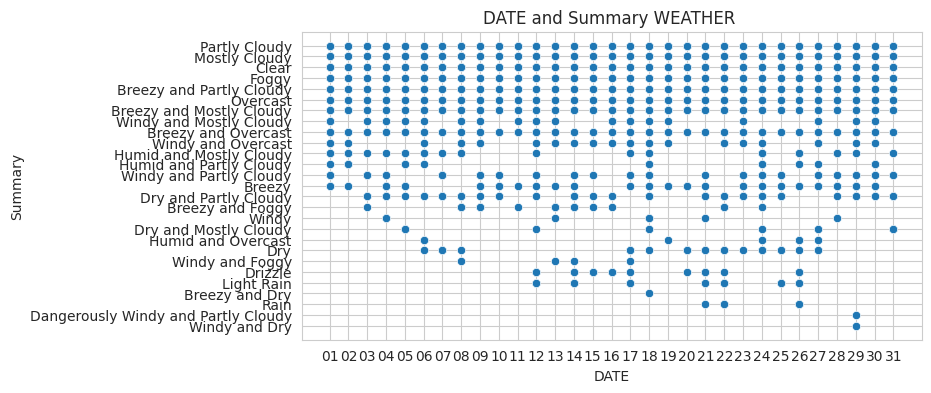

In [62]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=df_we2['DATE'], y=df_we2['Summary'], palette='viridis')
plt.title('DATE and Summary WEATHER ')
plt.show()

NO RELATIONSHIP BETWEEN DAY AND WEATHER.

# plots - time vs SUMMARY AND PRECIPITATION (year not considered)

In [63]:
# sorting the data using time
df_we2=df_we1.sort_values(by='time')

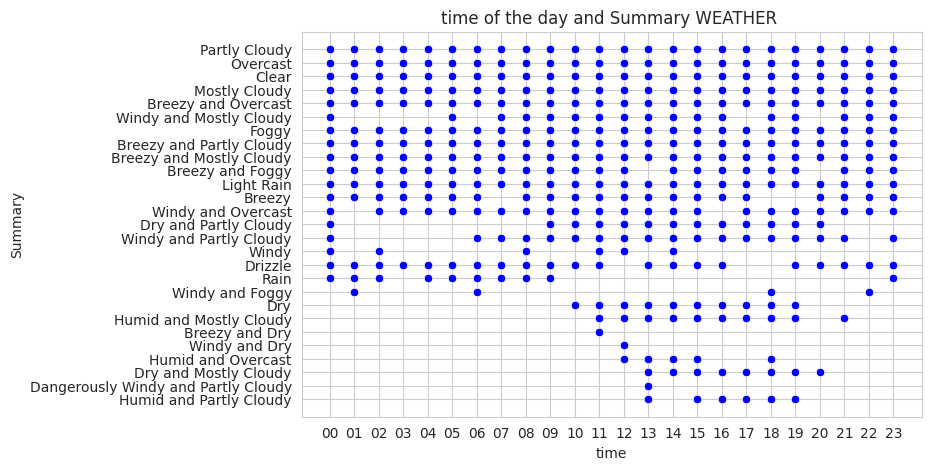

In [64]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_we2['time'], y=df_we2['Summary'],color='blue')
plt.title('time of the day and Summary WEATHER ')
plt.show()

Time has no control over  weather.

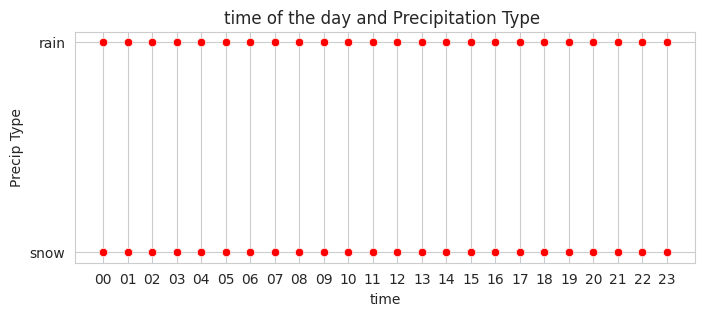

In [65]:
plt.figure(figsize=(8,3))
sns.scatterplot(x=df_we2['time'], y=df_we2['Precip Type'], color='red')
plt.title('time of the day and Precipitation Type ')
plt.show()

Time and precipitation has no relation as per the data .

# PLOT- TO UNDERSTAND RELATION BETWEEN UTC-OFFSET,HUMIDITY AND TEMPERATURE

Text(0.5, 1.0, 'Multiple bivariate KDE plot')

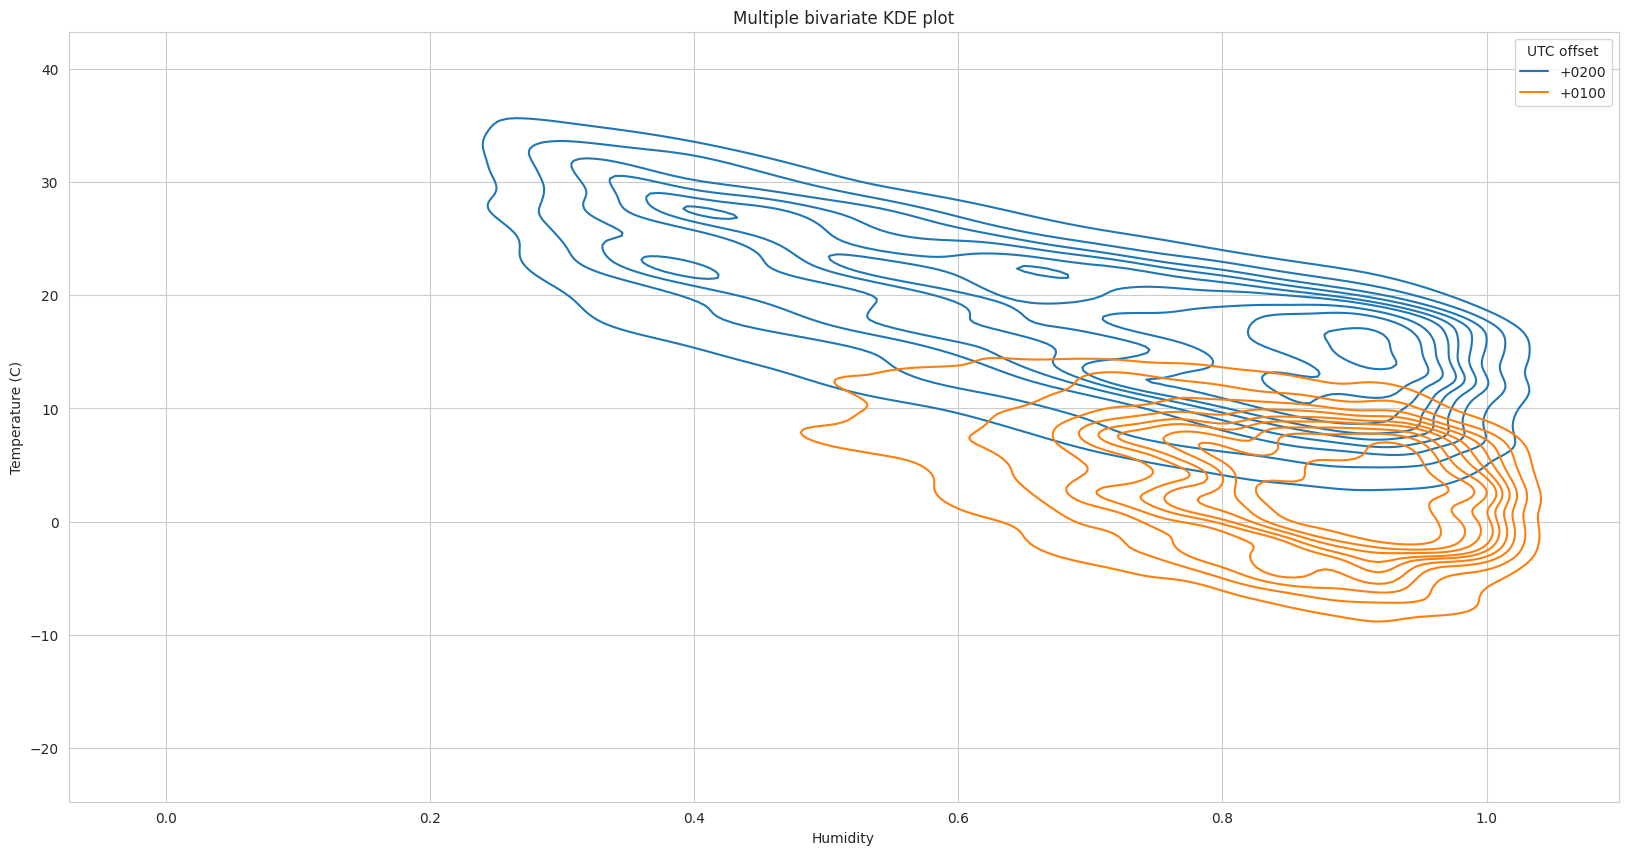

In [66]:
plt.figure(figsize=(20,10))
sns.kdeplot(
    data=df_we1,
    x="Humidity",
    y="Temperature (C)",
    hue="UTC offset",
    thresh=.1)
plt.title('Multiple bivariate KDE plot')

From the plot it is clear that utc-offset has an effect on the temperature distribution.

# Insights from exploring the data

1. year, and day has no effect on precipitation and weather summary while both mainly depends on the month, which is season.
2. as timezone changes there will be a change in temperature which may change overall daily weather condition.
3. visibility and humidity are related
4. temperature and humidity are related
5. temperature on the dry day is the highest while temperature on the foggy and breezy day is the lowest.
6. pressure will be low on windy and breezy days